 # Regression project ?
 
 - Here we suppose to train and tune a machine learning model in which, the house price is dependant variable and some general information are used as independant variable
 - Let's see what we got

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

### CSV to DataFrame

In [2]:
Data = pd.read_csv ("1632300362534233.csv")
Data.head ()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


### Management of missing data

- Here we are gonna remove data with missing or outliers

- oulier dara in "Area" column
- missing data in "Adress" column

In [3]:
Q1 = Data['Area'].quantile(0.25)
Q3 = Data['Area'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = (Data['Area'] < Q1 - threshold*IQR) | (Data['Area'] > Q3 + threshold*IQR)
Data = Data[~outliers]
Data.dropna ()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000,116666.67
3475,83,2,True,True,True,Niavaran,6800000000,226666.67
3476,75,2,False,False,False,Parand,365000000,12166.67
3477,105,2,True,True,True,Dorous,5600000000,186666.67


### Let's draw some plots before model training

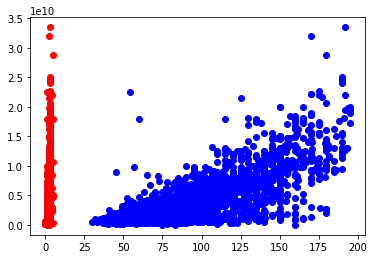

In [4]:
plt.scatter (x = Data [["Area"]], y = Data [["Price"]], color = "blue")
plt.scatter (x = Data [["Room"]], y = Data [["Price"]], color = "red")

## transforming the lable of the variables

- 1 : true
- 2: false 
- adress sould be categorized

In [5]:
Data [["Parking", "Warehouse", "Elevator"]] = Data[["Parking", "Warehouse", "Elevator"]].astype(int)
Data ['Address'] = pd.factorize( Data ['Address'])[0]
Data.head ()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,0,1850000000,61666.67
1,60,1,1,1,1,0,1850000000,61666.67
2,79,2,1,1,1,1,550000000,18333.33
3,95,2,1,1,1,2,902500000,30083.33
4,123,2,1,1,1,3,7000000000,233333.33


## Data splitting 

- we use 20% of data for tuning and 80% for training

In [6]:
msk = np.random.rand (len (Data)) < 0.8
train = Data [msk]
test = Data [~msk]

## Model training

- Multiple regressional linear model

In [7]:
from sklearn import linear_model

regr = linear_model.LinearRegression ()

Independants = ["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]

x = np.asanyarray (train [Independants])

y = np.asanyarray (train [["Price"]])

regr.fit (x,y)

print (regr.coef_)

print (regr.intercept_) 

[[ 9.16925342e+07 -8.14484059e+08  6.02252333e+08  3.34148809e+08
   2.40765007e+08  6.28956942e+06]]
[-4.31596224e+09]


In [8]:
from sklearn.metrics import r2_score

test_x = np.asanyarray (test [Independants])
test_y = np.asanyarray (test [["Price"]])
test_y_ = regr.predict (test_x)

print ("MAE = %.2f " % np.mean (np.absolute (test_y_ - test_y)))
print ("MSE = %.2f " % np.mean ((test_y_ - test_y)**2))
print ("R2 score = %.2f" % r2_score (test_y , test_y_))

MAE = 1846873693.67 
MSE = 7767355518384522240.00 
R2 score = 0.52
